In [41]:
class Pizza():
    def __init__(self, pizza_id, n_ingredients, ingredients):
        self.id = pizza_id
        self.n_ingredients = n_ingredients
        self.ingredients = ingredients
        
    def __repr__(self):
        return f"{self.n_ingredients}: {self.ingredients}"

In [134]:
def read_file(filename):
    # Read in content of file
    with open(filename, 'r') as file:
        lines = file.readlines()
    n_pizzas, n_team2, n_team3, n_team4 = list(map(int, lines[0].strip().split()))
    pizzas = []
    for pizza_id in range(n_pizzas):
        raw_pizza = lines[pizza_id+1].strip().split()
        n_ingredients = int(raw_pizza[0])
        ingredients = set(map(str, raw_pizza[1:]))
        pizzas.append(Pizza(pizza_id, n_ingredients, ingredients))
        
    return (n_pizzas, n_team2, n_team3, n_team4, pizzas)

In [71]:
def generate_output(filename, deliveries):
    with open(filename + '.out', 'w') as file:
        file.write(str(len(deliveries)) + '\n')
        for delivery in deliveries:
            file.write(str(delivery['n_people']) + ' ' + ' '.join(str(p.id) for p in delivery['pizzas']) + "\n")

In [46]:
def score(deliveries):
    score = 0
    for delivery in deliveries:
        ingredients = set()
        for pizza in delivery['pizzas']:
            ingredients = ingredients.union(pizza.ingredients)
        result += len(ingredients)**2
    return score

In [81]:
def solve(n_pizzas, n_team2, n_team3, n_team4, pizzas):
    pizzas.sort(reverse=True, key=lambda p: p.n_ingredients)
    deliveries = []
    for i in range(n_team4):
        if len(pizzas) < 4:
            break
        deliveries.append({"n_people": 4, "pizzas": pizzas[:4]})
        del pizzas[:4]

    for i in range(n_team3):
        if len(pizzas) < 3:
            break
        deliveries.append({"n_people": 3, "pizzas": pizzas[:3]})
        del pizzas[:3]

    for i in range(n_team2):
        if len(pizzas) < 2:
            break
        deliveries.append({"n_people": 2, "pizzas": pizzas[:2]})
        del pizzas[:2]
    return deliveries

In [108]:
# def make_delivery(pizzas, n_members):
#     team = []
#     ingredients = set()
    
#     pizzas.sort(reverse=True, key=lambda p: len(p.n_ingredients.difference(ingredients)))
#     p_best = pizzas.pop()
#     team.append(p_best)
    

def solve_many_ingredients(n_pizzas, n_team2, n_team3, n_team4, pizzas):
    deliveries = []
    for i in tqdm(range(n_team4)):
        if len(pizzas) < 4:
            break
        team = []
        ingredients = set()
        for j in range(4):
            pizzas.sort(reverse=True, key=lambda p: len(p.ingredients.difference(ingredients)))
            p_best = pizzas.pop(0)
            team.append(p_best)
            ingredients = ingredients.union(p_best.ingredients)

        deliveries.append({"n_people": 4, "pizzas": team})

    for i in tqdm(range(n_team3)):
        if len(pizzas) < 3:
            break
        team = []
        ingredients = set()
        for j in range(3):
            pizzas.sort(reverse=True, key=lambda p: len(p.ingredients.difference(ingredients)))
            p_best = pizzas.pop(0)
            team.append(p_best)
            ingredients = ingredients.union(p_best.ingredients)

        deliveries.append({"n_people": 3, "pizzas": team})

    for i in tqdm(range(n_team2)):
        if len(pizzas) < 2:
            break
        team = []
        ingredients = set()
        for j in range(2):
            pizzas.sort(reverse=True, key=lambda p: len(p.ingredients.difference(ingredients)))
            p_best = pizzas.pop(0)
            team.append(p_best)
            ingredients = ingredients.union(p_best.ingredients)

        deliveries.append({"n_people": 2, "pizzas": team})
    return deliveries
    

In [122]:
def solve_many_teams(n_pizzas, n_team2, n_team3, n_team4, pizzas):
    deliveries = []
    pizzas.sort(reverse=True, key=lambda p: p.n_ingredients)
    for i in range(n_team2):
        if len(pizzas) < 2:
            break
        deliveries.append({"n_people": 2, "pizzas": pizzas[:2]})
        del pizzas[:2]
    for i in range(n_team3):
        if len(pizzas) < 3:
            break
        deliveries.append({"n_people": 3, "pizzas": pizzas[:3]})
        del pizzas[:3]
    for i in range(n_team4):
        if len(pizzas) < 4:
            break
        deliveries.append({"n_people": 4, "pizzas": pizzas[:4]})
        del pizzas[:4]
    return deliveries

In [135]:
import os

for file in os.listdir('data'):
    if not file.endswith('.in'): # or FILE.startswith('d'):
        continue
    n_pizzas, n_team2, n_team3, n_team4, pizzas = read_file(f'data/{file}')
    
    deliveries = solve(n_pizzas, n_team2, n_team3, n_team4, pizzas)

    print(f"{file}: score = {score(deliveries)}")
    generate_output(f'data/{file}', deliveries)

b_little_bit_of_everything.in: score = 5612
c_many_ingredients.in: score = 686663538
d_many_pizzas.in: score = 5852236
e_many_teams.in: score = 8317908
a_example.in: score = 49


In [125]:
import os

for file in os.listdir('data'):
    if not file.endswith('.in'): # or FILE.startswith('d'):
        continue
    n_pizzas, n_team2, n_team3, n_team4, pizzas = read_file(f'data/{file}')
    
    deliveries = solve_many_teams(n_pizzas, n_team2, n_team3, n_team4, pizzas)

    print(f"{file}: score = {score(deliveries)}")
    generate_output(f'data/{file}', deliveries)

b_little_bit_of_everything.in: score = 7018
c_many_ingredients.in: score = 477546981
d_many_pizzas.in: score = 5220406
e_many_teams.in: score = 5076545
a_example.in: score = 61


In [109]:
import os
from tqdm import tqdm

for file in os.listdir('data'):
    if not file.endswith('.in'): # or FILE.startswith('d'):
        continue
    n_pizzas, n_team2, n_team3, n_team4, pizzas = read_file(f'data/{file}')
    
    deliveries = solve_many_ingredients(n_pizzas, n_team2, n_team3, n_team4, pizzas)

    print(f"{file}: score = {score(deliveries)}")
    generate_output(f'data/{file}', deliveries)

 62%|██████▏   | 40/65 [00:00<00:00, 30800.84it/s]


b_little_bit_of_everything.in: score = 7241


100%|██████████| 504/504 [00:17<00:00, 29.19it/s]


c_many_ingredients.in: score = 705586843


 18%|█▊        | 484/2742 [03:21<15:39,  2.40it/s]


KeyboardInterrupt: 

In [136]:
n_pizzas, n_team2, n_team3, n_team4, pizzas = read_file('data/b_little_bit_of_everything.in')
    
deliveries = solve(n_pizzas, n_team2, n_team3, n_team4, pizzas)

print(f"{file}: score = {score(deliveries)}")
generate_output(f'data/{file}', deliveries)

a_example.in.out: score = 5612


In [193]:
def neighbour(state):
    if len(state) < 2:
        return state
    
    result = state.copy()
    i1 = random.randint(0, len(result) - 1)
    i2 = random.randint(0, len(result) - 1)
    
    if i1 == i2:
        return result
    
    pizzas = state[i1]["pizzas"] + state[i2]["pizzas"]
    delivery = []
    ingredients = set()
    for j in range(max(len(state[i1]["pizzas"]), len(state[i1]["pizzas"]))):
        pizzas.sort(reverse=True, key=lambda p: len(p.ingredients.difference(ingredients)))
        p_best = pizzas.pop(0)
        delivery.append(p_best)
        ingredients = ingredients.union(p_best.ingredients)
    
    result[i1] = {"n_people": len(delivery), "pizzas": delivery}
    result[i2] = {"n_people": len(pizzas), "pizzas": pizzas}
     
    return result

In [195]:
def accept(new_score, score, temp):
    return math.exp((score - new_score) / temp)

In [155]:
import random
import numpy as np

In [196]:
state = deliveries
steps = 100000
temperature = 3000
current_score = score(state)
best_score = current_score
best_state = state
scores = []
accepts = []
for k in tqdm(range(steps)):
    new_state = neighbour(state)
    new_score = score(new_state)
    a = accept(new_score, current_score, temperature)
    if new_score > current_score or a >= random.random():
        state = new_state
        current_score = new_score
    if current_score > best_score:
        best_score = current_score
        best_state = state
    temperature *= 1 - 0.003
    accepts.append(a)
    scores.append(current_score)
score(best_state)

  4%|▎         | 3639/100000 [00:01<00:35, 2677.98it/s]


OverflowError: math range error

In [169]:
generate_output(f'data/b_little_bit_of_everything.in', state)

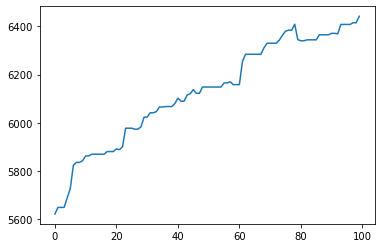

In [188]:
import matplotlib.pyplot as plt

plt.plot(scores)

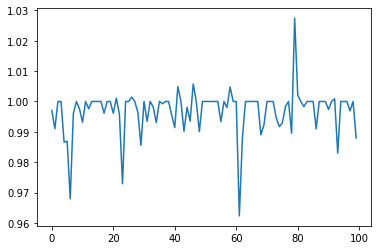

In [189]:
plt.plot(accepts)